# Predicting House Sale Prices

In this project, we will attempt to predict the sales price for each house using linear regression

The dataset contains explanatory variables describing (almost) every aspect of  homes  data collected from residential homes in Ames, Iowa.

More information about the dataset can be found here: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
%matplotlib inline
pd.set_option('display.max_columns', 500)

data = pd.read_csv("AmesHousing.tsv.txt", sep='\t')
data.shape

(2930, 82)

In [57]:
data.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1180.0,Unf,0.0,415.0,1595.0,GasA,Ex,Y,SBrkr,1616,0,0,1

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

## Data Cleaning & Feature Engineering

This dataset has a total of 82 columns and 2930 rows. 

To clean up the data for linear regression, we will do the following:

* Drop any columns with 5% or more missing values for now.
* For text columns, drop any with 1 or more missing values for now.
* For numerical columns with missing values, fill in with the most common value in that column.
* Drop any columns that aren't useful for machine learning and leak data about the final sale.

In [59]:
# Find number of missing values
num_missing = data.isnull().sum()
num_missing

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual

In [60]:
# Find columns with >5% missing values
missing_cols = num_missing[(num_missing > len(data) * 0.05)].sort_values()
missing_cols

Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Qual       159
Garage Cond       159
Lot Frontage      490
Fireplace Qu     1422
Fence            2358
Alley            2732
Misc Feature     2824
Pool QC          2917
dtype: int64

In [61]:
# Dropping columns with >5% missing values
data = data.drop(missing_cols.index, axis=1)

In [62]:
# Finding text columns with 1 or more missing values
missing_text_count = data.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
missing_text_count

Bsmt Exposure     83
BsmtFin Type 2    81
BsmtFin Type 1    80
Bsmt Qual         80
Bsmt Cond         80
Mas Vnr Type      23
Electrical         1
Utilities          0
Lot Config         0
Land Slope         0
Roof Matl          0
Land Contour       0
Lot Shape          0
Street             0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Roof Style         0
Sale Condition     0
Exterior 1st       0
Exterior 2nd       0
Sale Type          0
Exter Qual         0
Exter Cond         0
Foundation         0
Heating            0
Heating QC         0
Central Air        0
Kitchen Qual       0
Functional         0
Paved Drive        0
MS Zoning          0
dtype: int64

In [63]:
# Dropping text columns with 1 or more missing values
missing_cols_text = missing_text_count[missing_text_count > 0]

data = data.drop(missing_cols_text.index, axis=1)

In [64]:
# Find missing value counts for numerical columns
num_missing = data.select_dtypes(include=['int', 'float']).isnull().sum()
fixable_numeric_cols = num_missing[(num_missing < len(data)/20) & (num_missing > 0)].sort_values()
fixable_numeric_cols

BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
Bsmt Full Bath     2
Bsmt Half Bath     2
Mas Vnr Area      23
dtype: int64

There are some NA values in the numerical columns, filling them up using the mean or median wouldn't be suitable as some of the columns are categorical. We will use the mode instead.

In [65]:
# Calculate mode for numerical columns with missing values
replacement_values_dict = data[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
replacement_values_dict

{'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Bsmt Unf SF': 0.0,
 'Total Bsmt SF': 0.0,
 'Garage Cars': 2.0,
 'Garage Area': 0.0,
 'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Mas Vnr Area': 0.0}

In [66]:
# Replace missing values with mode
data = data.fillna(replacement_values_dict)

In [67]:
# Verify missing values are gone
data.isnull().sum().value_counts()

0    64
dtype: int64

The columns 'Year built' and 'Year Remod/Add' do not add much to our model, instead we can generate a new column to determine how old the house is since the last remodelling.

In [68]:
years_sold = data['Yr Sold'] - data['Year Built']
years_sold[years_sold < 0]

2180   -1
dtype: int64

In [69]:
years_since_remod = data['Yr Sold'] - data['Year Remod/Add']
years_since_remod[years_since_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [70]:
# Create new columns
data['Years Before Sale'] = years_sold
data['Years Since Remod'] = years_since_remod

# Drop rows with negative values for the new features
data = data.drop([1702, 2180, 2181], axis=0)

# Remove original year columns
data = data.drop(["Year Built", "Year Remod/Add"], axis = 1)

In [71]:
## Drop columns that aren't useful for ML
data = data.drop(["PID", "Order"], axis=1)

## Drop columns that leak info about the final sale
data = data.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

## Feature Selection

In [72]:
numerical_data = data.select_dtypes(include=['integer', 'float'])
numerical_data

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Years Before Sale,Years Since Remod
0,20,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,2.0,528.0,210,62,0,0,0,0,0,215000,50,50
1,20,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,105000,49,49
2,20,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,172000,52,52
3,20,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,2.0,522.0,0,0,0,0,0,0,0,244000,42,42
4,60,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,189900,13,12
5,60,9978,6,6,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,2.0,470.0,360,36,0,0,0,0,0,195500,12,12
6,120,4920,8,5,0.0,616.0,0.0,722.0,1338.0,1338,0,0,1338,1.0,0.0,2,0,2,1,6,0,2.0,582.0,0,0,170,0,0,0,0,213500,9,9
7,120,5005,8,5,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,2.0,506.0,0,82,0,0,144,0,0,191500,18,18
8,120,5389,8,5,0.0,1180.0,0.0,415.0,1595.0,1616,0,0,1616,1.0,0.0,2,0,2,1,5,1,2.0,608.0,237,152,0,0,0,0,0,236500,15,14
9,60,7500,7,5,0.0,0.0,0.0,994.0,994.0,1028,776,0,1804,0.0,0.0,2,1,3,1,7,1,2.0,442.0,140,60,0,0,0,0,0,189000,11,11


In [73]:
abs_corr_coeffs = numerical_data.corr()['SalePrice'].abs().sort_values(ascending=False)
abs_corr_coeffs

SalePrice            1.000000
Overall Qual         0.801206
Gr Liv Area          0.717596
Garage Cars          0.648361
Total Bsmt SF        0.644012
Garage Area          0.641425
1st Flr SF           0.635185
Years Before Sale    0.558979
Full Bath            0.546118
Years Since Remod    0.534985
Mas Vnr Area         0.506983
TotRms AbvGrd        0.498574
Fireplaces           0.474831
BsmtFin SF 1         0.439284
Wood Deck SF         0.328183
Open Porch SF        0.316262
Half Bath            0.284871
Bsmt Full Bath       0.276258
2nd Flr SF           0.269601
Lot Area             0.267520
Bsmt Unf SF          0.182751
Bedroom AbvGr        0.143916
Enclosed Porch       0.128685
Kitchen AbvGr        0.119760
Screen Porch         0.112280
Overall Cond         0.101540
MS SubClass          0.085128
Pool Area            0.068438
Low Qual Fin SF      0.037629
Bsmt Half Bath       0.035875
3Ssn Porch           0.032268
Misc Val             0.019273
BsmtFin SF 2         0.006127
Name: Sale

In [74]:
## Keep columns with a correlation coefficient of larger than 0.4 (arbitrary, worth experimenting later!)
abs_corr_coeffs[abs_corr_coeffs > 0.4]

SalePrice            1.000000
Overall Qual         0.801206
Gr Liv Area          0.717596
Garage Cars          0.648361
Total Bsmt SF        0.644012
Garage Area          0.641425
1st Flr SF           0.635185
Years Before Sale    0.558979
Full Bath            0.546118
Years Since Remod    0.534985
Mas Vnr Area         0.506983
TotRms AbvGrd        0.498574
Fireplaces           0.474831
BsmtFin SF 1         0.439284
Name: SalePrice, dtype: float64

In [75]:
# Drop columns with less than 0.4 correlation with SalePrice
data = data.drop(abs_corr_coeffs[abs_corr_coeffs < 0.4].index, axis=1)

In [76]:
# Create a list of column names from documentation that are meant to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [77]:
# Find categorical columns remaining in transform_data
transform_cat_cols = []
for col in nominal_features:
    if col in data.columns:
        transform_cat_cols.append(col)

# Find no. of unique values in each categorical column
uniqueness_counts = data[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()

# Aribtrary cutoff of 10 unique values (worth experimenting)
drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
data = data.drop(drop_nonuniq_cols, axis=1)

In [78]:
# Select just the remaining text columns and convert to categorical
text_cols = data.select_dtypes(include=['object'])
for col in text_cols:
    data[col] = data[col].astype('category')
    
# Create dummy columns and add back to the dataframe
data = pd.concat([data, 
                pd.get_dummies(data.select_dtypes(include=['category']))
                ], axis=1)

## Creating Functions with Adjustable Parameters 
To quickly iterate on different models, we need to setup a pipeline of functions shown below:

In [79]:
#  This function will perform all the data cleaning operations I've explained above.
def transform_features(data, pct_missing=0.05):
    num_missing = data.isnull().sum()
    missing_cols = num_missing[(num_missing > len(data)*pct_missing)].sort_values()
    data = data.drop(missing_cols.index, axis=1)
    
    missing_text_count = data.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    missing_cols_text = missing_text_count[missing_text_count > 0]
    data = data.drop(missing_cols_text.index, axis=1)
    
    num_missing = data.select_dtypes(include=['integer', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(data)*pct_missing) & (num_missing > 0)].sort_values()
    replacement_values_dict = data[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    data = data.fillna(replacement_values_dict)
    
    years_sold = data['Yr Sold'] - data['Year Built']
    years_since_remod = data['Yr Sold'] - data['Year Remod/Add']
    data['Years Before Sale'] = years_sold
    data['Years Since Remod'] = years_since_remod
    transformed_data = data.drop([1702, 2180, 2181], axis=0)
    transformed_data = data.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", "Year Remod/Add"], axis=1)
    
    return transformed_data

For the feature engineering and selection step, we chose columns that had more than 0.4 correlation with 'SalePrice' and removed any columns with more than 10 categories. but these parameters can be adjusted with the function below.

In [80]:
# Returns dataframe with selected features
def select_features(data, coeff_threshold=0.4, uniq_threshold=10):
    numeric_data = data.select_dtypes(include=['integer', 'float'])
    abs_corr_coeffs = numeric_data.corr()['SalePrice'].abs().sort_values()
    data = data.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    transform_cat_cols = []
    for col in nominal_features:
        if col in data.columns:
            transform_cat_cols.append(col)

    uniqueness_counts = data[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
    data = data.drop(drop_nonuniq_cols, axis=1)
    
    text_cols = data.select_dtypes(include=['object'])
    for col in text_cols:
        data[col] = data[col].astype('category')
    filtered_data = pd.concat([data, pd.get_dummies(data.select_dtypes(include=['category']))], axis=1)
    
    return filtered_data

## Applying Machine Learning

Using the linear regression model from scikit-learn. It should work well here as our target column 'SalePrice' is a continuous value. RMSE will be used as an error metric to evaluate this model.

We can use KFold cross validation to split the data in K number of folds. Using the KFold function from scikit learn, we can get the indices for the testing and training sets.

In [81]:
# Tests model on test data and returns RMSE
def train_and_test(data, k=0):
    numeric_data = data.select_dtypes(include=['integer', 'float'])
    features = numeric_data.columns.drop("SalePrice")
    lr = LinearRegression()
    
    if k == 0:
        train = data[:1460]
        test = data[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    elif k == 1:
        # Randomize rows
        shuffled_data = data.sample(frac=1)
        train = data[:1460]
        test = data[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        
        return avg_rmse
    
    else:
        kf = KFold(n_splits=k, shuffle=True, random_state=2)
        rmse_values = []
        for train_index, test_index, in kf.split(data):
            train = data.iloc[train_index]
            test = data.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        
        avg_rmse = np.mean(rmse_values)
        
        return avg_rmse


29306.558023264395


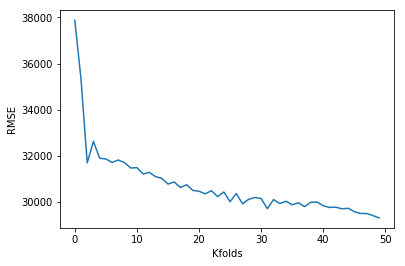

In [84]:
data = pd.read_csv("AmesHousing.tsv.txt", sep="\t")

transformed_data = transform_features(data, pct_missing=0.05)
filtered_data = select_features(transformed_data, 0.4, 10) 

rmse_values = []
for i in range(50):
    rmse = train_and_test(filtered_data, k=i)
    rmse_values.append(rmse) 

# Plot RMSE 
x = [i for i in range(50)]
plt.plot(x, results)
plt.xlabel('Kfolds')
plt.ylabel('RMSE')

print(results[49])

It seems the average RMSE goes down as we increase the number of folds. This makes sense as the RMSE shown on the graph above is an average of the cross validation tests. A larger K means we have less bias towards overestimating the model's true error. As a trade off, this requires more computation time.

We can experiment further with different parameters such as the missing data threshold, correlation threshold, unique values cutoff, to achieve a better result.